In [19]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib as mpl
import warnings
# A main module to run various analysis with CFE model
import sys
import json
sys.path.append(r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\libs\cfe_py")
import bmi_cfe
import shutil

warnings.filterwarnings("ignore")

# Posterior parameter range

## Config

In [20]:
site = "Mahurangi"
post_case = rf"{site}-2024-03-30"
pre_case = f"{site}-2024-03-22"

# site = "Coweeta"
# post_case = rf"{site}-2024-03-30"
# pre_case = f"{site}-2024-03-23"

n_criteria = 3
quantiles = [5, 50, 95]
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
color = ["#bcbcbc", "#3388b6", "#ff993e"]
mpl.rcParams['axes.prop_cycle'] = cycler(color=color)

In [21]:
input_dir_post = os.path.join(home_dir, "4_GLUE_postrun", "results", post_case)
input_dir_pre = os.path.join(home_dir, "3_GLUE_prerun", "results", pre_case)
output_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\figs\supplemental\revision"
# output_dir = os.path.join(home_dir, "5_post_analysis", "results", "GLUEpost_rev",post_case)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

senario_names = ['KGE on Flow', 'KGE on flow + KGE on soil moisture', 'KGE on flow + Soil moisture seasonal timing error']
senario_short_names = ['Scenario Reference', 'Scenario SM1', 'Scenario SM2']

In [22]:
data_types = {'KGE on Flow_Behavioral': 'bool', 'KGE on Soil_Behavioral': 'bool', 'GLUE_results_Behavioral': 'bool', 'SeasonTrans of Soil wet2dry_end_Behavioral':'bool'}
for i in range(1, n_criteria+1):
    _eval_results = pd.read_csv(os.path.join(input_dir_post, f'criteria_{i}', 'post_evaluations.csv'), index_col=0, dtype=data_types)
    _eval_results['criteria_id'] = i
    if i==1:
        eval_results = _eval_results
    else:
        eval_results = pd.concat([eval_results, _eval_results])

print(len(eval_results))
eval_results.head()

183124


,NSE on Flow,NSE on Soil,KGE on Flow,KGE on Soil,SeasonTrans of Soil dry2wet_start,SeasonTrans of Soil dry2wet_end,SeasonTrans of Soil wet2dry_start,SeasonTrans of Soil wet2dry_end,SeasonTrans of Soil dry2wet_start_raw,SeasonTrans of Soil dry2wet_end_raw,SeasonTrans of Soil wet2dry_start_raw,SeasonTrans of Soil wet2dry_end_raw,KGE on Flow_Behavioral,GLUE_results_Behavioral,criteria_id,KGE on Soil_Behavioral,SeasonTrans of Soil dry2wet_start_Behavioral,SeasonTrans of Soil dry2wet_end_Behavioral,SeasonTrans of Soil wet2dry_start_Behavioral,SeasonTrans of Soil wet2dry_end_Behavioral
run_id,,,,,,,,,,,,,,,,,,,,
0,0.870583,-0.116197,0.879833,0.723320,0.898833,32.207192,0.077867,1.788701,"[15.947310891002417, 5.507696024607867, -18.75...","[-62.58391141379252, -14.955658408813179, -19....","[3.553183412645012, 5.564178702421486, -9.3509...","[2.839305623434484, -7.19964348943904, -1.0057...",True,True,1,NaN,NaN,NaN,NaN,NaN
2,0.742028,-1.650655,0.783288,0.794262,2.027438,30.647320,0.391725,8.624781,"[18.15436767693609, 6.544598508160561, -18.616...","[-60.39012540364638, -10.609820154961199, -20....","[3.6848616492934525, 4.674633755348623, -7.184...","[17.2484363601543, 1.0754332607612014, 7.55047...",True,True,1,NaN,NaN,NaN,NaN,NaN
3,0.869110,0.677258,0.873533,0.816237,2.029368,30.500882,0.682203,4.121407,"[17.889151433017105, 6.2895186031237245, -18.0...","[-60.24108660873026, -11.23238810757175, -20.0...","[4.616347371600568, 5.564206396695226, -8.1339...","[7.981033302843571, -2.0500190486200154, 6.433...",True,True,1,NaN,NaN,NaN,NaN,NaN
6,0.885031,-1.240381,0.838710,0.476138,7.209802,10.672729,8.320244,36.592321,"[23.50464104535058, 13.580517184454948, -15.45...","[-35.17803863529116, 12.557064292952418, -9.39...","[11.951880872715265, 4.970296945888549, 8.0385...","[33.30328246532008, 37.14795339619741, 39.3257...",True,True,1,NaN,NaN,NaN,NaN,NaN
7,0.875218,-3.525154,0.873582,0.735918,5.735942,23.454017,3.087982,24.516705,"[24.084008362144232, 9.318390148691833, -16.19...","[-53.26626322371885, 1.721834641881287, -18.81...","[7.352020290214568, 4.966070482041687, -3.0541...","[24.73943949304521, 19.056498429737985, 29.754...",True,True,1,NaN,NaN,NaN,NaN,NaN


In [23]:
eval_results.groupby("criteria_id").count()["GLUE_results_Behavioral"]

criteria_id
1    91324
2    61063
3    30737
Name: GLUE_results_Behavioral, dtype: int64

In [24]:
param_pre = pd.read_csv(os.path.join(input_dir_pre, 'prior_parameters.csv'), index_col=0)
print(len(param_pre))
param_pre.head()

100000


,bb,satdk,slop,smcmax,wltsmc,max_gw_storage,expon
run_id,,,,,,,
0,15.241602,0.003717,0.305407,0.511144,0.303985,0.143744,2.829918
1,9.591115,0.009610,0.288152,0.431847,0.337942,0.134378,4.848366
2,8.110328,0.003576,0.073707,0.564340,0.250904,0.166409,7.468712
3,15.606284,0.008876,0.088979,0.540960,0.311782,0.158104,3.165957
4,4.477468,0.005622,0.134352,0.402397,0.273392,0.175923,2.118343


In [25]:
df_post = eval_results.join(param_pre, how="left")
print(len(df_post))
df_post.head()

183124


,NSE on Flow,NSE on Soil,KGE on Flow,KGE on Soil,SeasonTrans of Soil dry2wet_start,SeasonTrans of Soil dry2wet_end,SeasonTrans of Soil wet2dry_start,SeasonTrans of Soil wet2dry_end,SeasonTrans of Soil dry2wet_start_raw,SeasonTrans of Soil dry2wet_end_raw,...,SeasonTrans of Soil dry2wet_end_Behavioral,SeasonTrans of Soil wet2dry_start_Behavioral,SeasonTrans of Soil wet2dry_end_Behavioral,bb,satdk,slop,smcmax,wltsmc,max_gw_storage,expon
run_id,,,,,,,,,,,,,,,,,,,,,
0,0.870583,-0.116197,0.879833,0.723320,0.898833,32.207192,0.077867,1.788701,"[15.947310891002417, 5.507696024607867, -18.75...","[-62.58391141379252, -14.955658408813179, -19....",...,NaN,NaN,NaN,15.241602,0.003717,0.305407,0.511144,0.303985,0.143744,2.829918
0,0.870583,-0.116197,0.879833,0.723320,0.898833,32.207192,0.077867,1.788701,"[15.947310891002417, 5.507696024607867, -18.75...","[-62.58391141379252, -14.955658408813179, -19....",...,NaN,NaN,NaN,15.241602,0.003717,0.305407,0.511144,0.303985,0.143744,2.829918
2,0.742028,-1.650655,0.783288,0.794262,2.027438,30.647320,0.391725,8.624781,"[18.15436767693609, 6.544598508160561, -18.616...","[-60.39012540364638, -10.609820154961199, -20....",...,NaN,NaN,NaN,8.110328,0.003576,0.073707,0.564340,0.250904,0.166409,7.468712
2,0.742028,-1.650655,0.783288,0.794262,2.027438,30.647320,0.391725,8.624781,"[18.15436767693609, 6.544598508160561, -18.616...","[-60.39012540364638, -10.609820154961199, -20....",...,NaN,NaN,NaN,8.110328,0.003576,0.073707,0.564340,0.250904,0.166409,7.468712
3,0.869110,0.677258,0.873533,0.816237,2.029368,30.500882,0.682203,4.121407,"[17.889151433017105, 6.2895186031237245, -18.0...","[-60.24108660873026, -11.23238810757175, -20.0...",...,NaN,NaN,NaN,15.606284,0.008876,0.088979,0.540960,0.311782,0.158104,3.165957


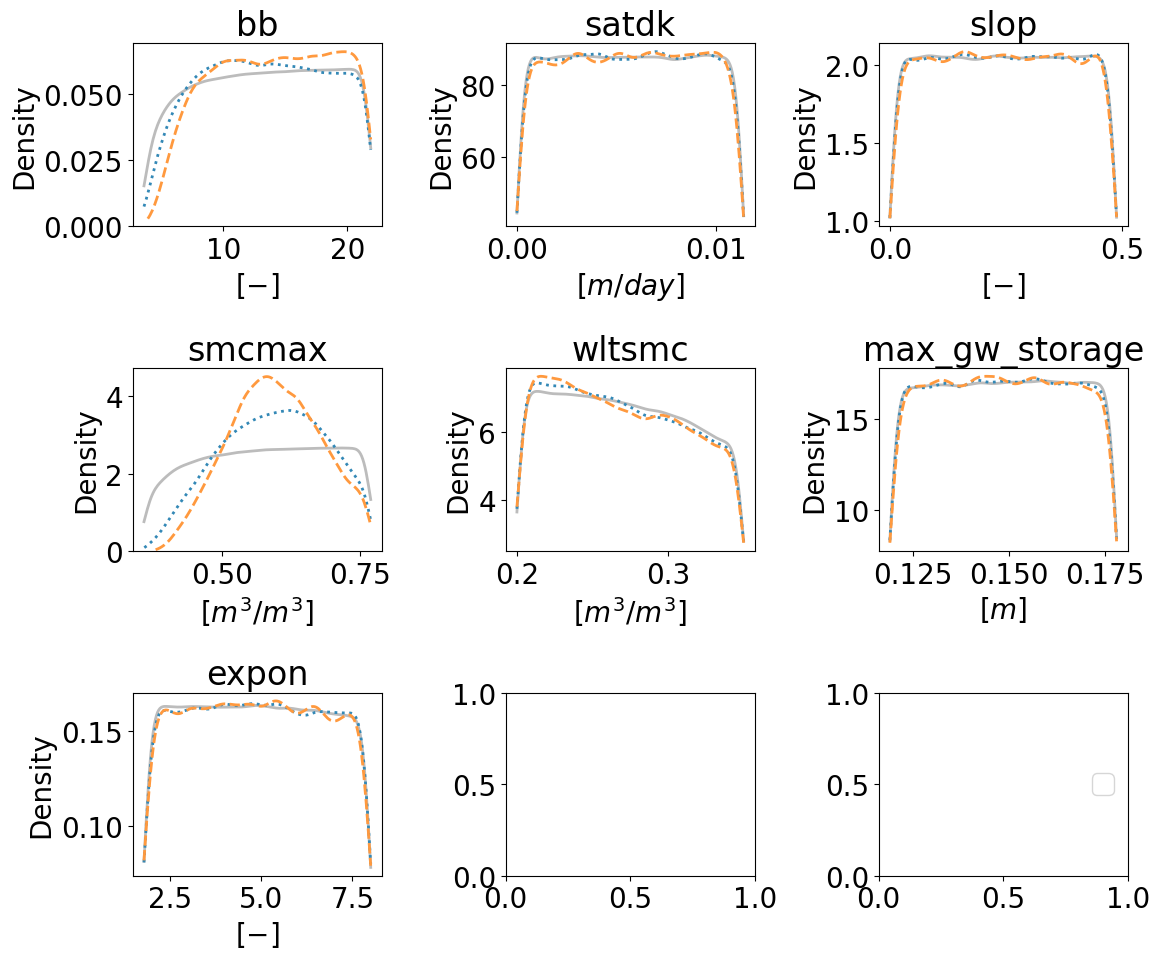

In [26]:
# Create a mapping between fig_title and eval_results_names

params = ['bb',	'satdk',	'slop'	,'smcmax'	,'wltsmc'	,'max_gw_storage', 'expon']
param_unit = [r'$[-]$',	r'$[m/day]$',	r'$[-]$'	,r'$[m^3/m^3]$'	,r'$[m^3/m^3]$',r'$[m]$', r'$[-]$']
num_params = len(params)
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

# Iterate over the metrics
for idx, param in enumerate(params):
    row, col = divmod(idx, 3)  # Convert 1D index to 2D index
    ax = axs[row, col]  # Access the correct subplot

    plt.rc('font', size=20)

    # Iterate over criteria
    for i in range(1, n_criteria+1):
        x = df_post[param][df_post['criteria_id'] == i].values

        #plot CDF
        if i == 1:
            linestyle='-'
        elif i== 2:
            linestyle=':'
        elif i==3:
            linestyle = '--'

        # Get min and max values of the data
        min_value = np.min(x)
        max_value = np.max(x)

        # Plot normalized KDE without facecolor and clipped at min and max
        sns.kdeplot(x, ax=ax, fill=False, linestyle=linestyle,linewidth=2,  label=f"{senario_short_names[i-1]}\n{senario_names[i-1]}", clip=(min_value, max_value))

        # sns.kdeplot(x, ax=ax, fill=False, linestyle=linestyle, linewidth=2, label=f"{senario_short_names[i-1]}\n{senario_names[i-1]}")
        # ax.hist(x, alpha=0.75, label=f"{senario_short_names[i-1]}\n{senario_names[i-1]}", linestyle=linestyle)
        # ax.plot(x, y, label=f"{senario_short_names[i-1]}\n{senario_names[i-1]}", linewidth=5, alpha=0.7, linestyle=linestyle)
        
    ax.set_title(param)
    ax.set_xlabel(f'{param_unit[idx]}')
    ax.set_ylabel(f'Density')

fig.tight_layout()
plt.legend(loc='center right') #, bbox_to_anchor=(1, 0.5))


fig.savefig(os.path.join(output_dir, f'param_dist_{site}.pdf'), dpi=600, bbox_inches='tight')


# Intersection of different criteria

In [27]:
df_pre = pd.read_csv(os.path.join(input_dir_pre, 'evaluation_metrics.csv'), index_col=0)
df_pre['bias_in_seasonsig_dates_max'] = df_pre[['SeasonTrans of Soil dry2wet_start','SeasonTrans of Soil dry2wet_end','SeasonTrans of Soil wet2dry_start','SeasonTrans of Soil wet2dry_end']].max(axis='columns')

In [28]:
def is_behavioral(value, criteria, comparison_type):
    if comparison_type == 'greater':
        return value > criteria
    elif comparison_type == 'less':
        return value < criteria

# ... similarly define for other metrics
criteria_dict = {
    'KGE on Flow': {'criteria': 0.5, 'comparison_type': 'greater'},
    'KGE on Soil': {'criteria': 0.5, 'comparison_type': 'greater'},
    'SeasonTrans of Soil dry2wet_start': {'criteria': 30, 'comparison_type': 'less'},
    'SeasonTrans of Soil dry2wet_end': {'criteria': 30, 'comparison_type': 'less'},
    'SeasonTrans of Soil wet2dry_start': {'criteria': 30, 'comparison_type': 'less'},
    'SeasonTrans of Soil wet2dry_end': {'criteria': 30, 'comparison_type': 'less'},
    'bias_in_seasonsig_dates_max': {'criteria': 30, 'comparison_type': 'less'}
    # Add other columns and their criteria here
}

# Apply these criteria to create new columns
for column, info in criteria_dict.items():
    criteria = info['criteria']
    comparison_type = info['comparison_type']
    new_column_name = f'{column}_Behavioral'
    df_pre[new_column_name] = df_pre[column].apply(lambda x: is_behavioral(x, criteria, comparison_type))
    # Print the count of 'True' values for each new column
    true_count = df_pre[new_column_name].sum()
    print(f"Number of behavioral runs {column}: {true_count}")

Number of behavioral runs KGE on Flow: 91324
Number of behavioral runs KGE on Soil: 61166
Number of behavioral runs SeasonTrans of Soil dry2wet_start: 99996
Number of behavioral runs SeasonTrans of Soil dry2wet_end: 54586
Number of behavioral runs SeasonTrans of Soil wet2dry_start: 99996
Number of behavioral runs SeasonTrans of Soil wet2dry_end: 56126
Number of behavioral runs bias_in_seasonsig_dates_max: 30743


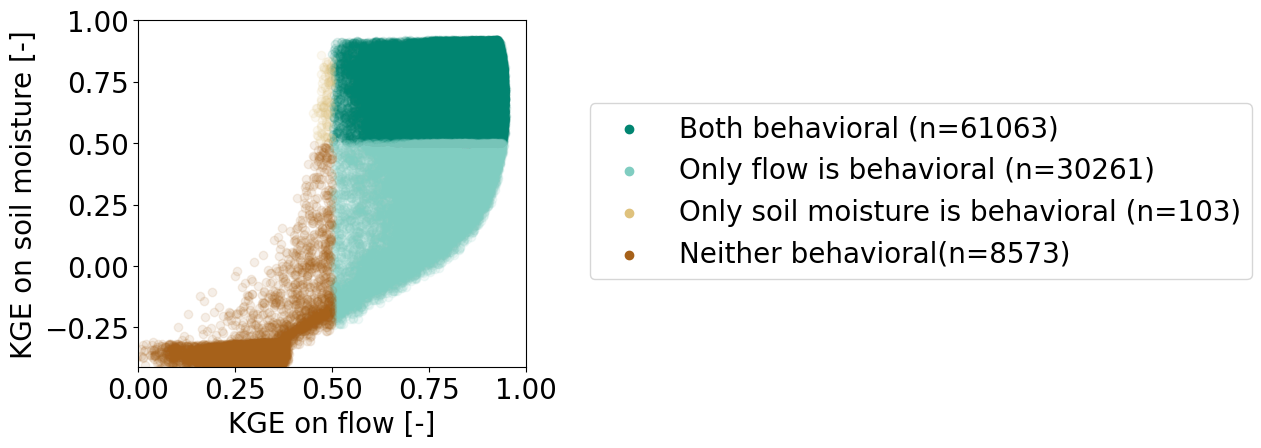

In [29]:
fig, ax =  plt.subplots(figsize=(5, 4.5))
x = df_pre['KGE on Flow'].values
y = df_pre['KGE on Soil'].values

# Use the new behavioral columns
x_behavioral = df_pre['KGE on Flow_Behavioral'].values
y_behavioral = df_pre[f'KGE on Soil_Behavioral'].values

x_and_y_behavioral = np.logical_and(x_behavioral, y_behavioral)
only_y_behavioral = np.logical_and(y_behavioral, np.logical_not(x_behavioral))
only_x_behavioral = np.logical_and(x_behavioral, np.logical_not(y_behavioral))
neither_behavioral = np.logical_not(np.logical_or(x_behavioral, y_behavioral))

# Plot each category with its respective color and label
dot_alpha = 0.1
plt.scatter(x[x_and_y_behavioral], y[x_and_y_behavioral], alpha=dot_alpha, color='#018571', label=f'Both behavioral (n={np.count_nonzero(x_and_y_behavioral)})')
plt.scatter(x[only_x_behavioral], y[only_x_behavioral], alpha=dot_alpha, color='#80cdc1', label=f'Only flow is behavioral (n={np.count_nonzero(only_x_behavioral)})')
plt.scatter(x[only_y_behavioral], y[only_y_behavioral], alpha=dot_alpha, color='#dfc27d', label=f'Only soil moisture is behavioral (n={np.count_nonzero(only_y_behavioral)})')
plt.scatter(x[neither_behavioral], y[neither_behavioral], alpha=dot_alpha, color='#a6611a', label=f'Neither behavioral(n={np.count_nonzero(neither_behavioral)})')

# Set labels, limits, title, and invert x-axis as in the original code
ax.set_xlabel('KGE on flow [-]')
ax.set_ylabel('KGE on soil moisture [-]')
ax.set_xlim([0, 1])
ax.set_ylim([-0.41, 1])

# Create a legend and save the figure
from matplotlib.legend_handler import HandlerPathCollection
legend = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for handle in legend.legendHandles:
    handle.set_alpha(1.0)  # Set legend markers to full opacity
# fig.savefig(os.path.join(out_path, f'seasonsig_{seasonsig_var}.png'), bbox_inches='tight')


fig.savefig(os.path.join(output_dir, f'criteria_{site}_KGESM.pdf'), dpi=600, bbox_inches='tight')

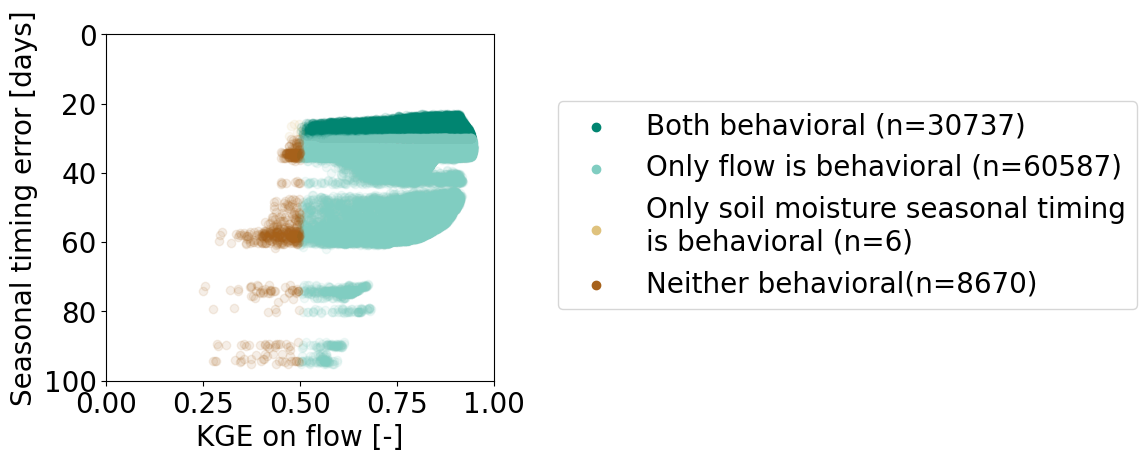

In [30]:
fig, ax =  plt.subplots(figsize=(5, 4.5))
x = df_pre['KGE on Flow'].values
y = df_pre['bias_in_seasonsig_dates_max'].values

# Use the new behavioral columns
x_behavioral = df_pre['KGE on Flow_Behavioral'].values
y_behavioral = df_pre[f'bias_in_seasonsig_dates_max_Behavioral'].values

x_and_y_behavioral = np.logical_and(x_behavioral, y_behavioral)
only_y_behavioral = np.logical_and(y_behavioral, np.logical_not(x_behavioral))
only_x_behavioral = np.logical_and(x_behavioral, np.logical_not(y_behavioral))
neither_behavioral = np.logical_not(np.logical_or(x_behavioral, y_behavioral))

# Plot each category with its respective color and label
dot_alpha = 0.1
plt.scatter(x[x_and_y_behavioral], y[x_and_y_behavioral], alpha=dot_alpha, color='#018571', label=f'Both behavioral (n={np.count_nonzero(x_and_y_behavioral)})')
plt.scatter(x[only_x_behavioral], y[only_x_behavioral], alpha=dot_alpha, color='#80cdc1', label=f'Only flow is behavioral (n={np.count_nonzero(only_x_behavioral)})')
plt.scatter(x[only_y_behavioral], y[only_y_behavioral], alpha=dot_alpha, color='#dfc27d', label=f'Only soil moisture seasonal timing' +  '\n' + f'is behavioral (n={np.count_nonzero(only_y_behavioral)})')
plt.scatter(x[neither_behavioral], y[neither_behavioral], alpha=dot_alpha, color='#a6611a', label=f'Neither behavioral(n={np.count_nonzero(neither_behavioral)})')


# Set labels, limits, title, and invert x-axis as in the original code
ax.set_xlabel('KGE on flow [-]')
ax.set_ylabel('Seasonal timing error [days]')
ax.set_xlim([0, 1])
ax.set_ylim([0, 100])

# Create a legend and save the figure
from matplotlib.legend_handler import HandlerPathCollection
legend = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for handle in legend.legendHandles:
    handle.set_alpha(1.0)  # Set legend markers to full opacity
ax.invert_yaxis()
# fig.savefig(os.path.join(out_path, f'seasonsig_{seasonsig_var}.png'), bbox_inches='tight')


fig.savefig(os.path.join(output_dir, f'criteria_{site}_KGESM.pdf'), dpi=600, bbox_inches='tight')

# NSE vs KGE 

In [31]:
df_pre.columns

Index(['NSE on Flow', 'NSE on Soil', 'KGE on Flow', 'KGE on Soil',
       'SeasonTrans of Soil dry2wet_start', 'SeasonTrans of Soil dry2wet_end',
       'SeasonTrans of Soil wet2dry_start', 'SeasonTrans of Soil wet2dry_end',
       'SeasonTrans of Soil dry2wet_start_raw',
       'SeasonTrans of Soil dry2wet_end_raw',
       'SeasonTrans of Soil wet2dry_start_raw',
       'SeasonTrans of Soil wet2dry_end_raw', 'bias_in_seasonsig_dates_max',
       'KGE on Flow_Behavioral', 'KGE on Soil_Behavioral',
       'SeasonTrans of Soil dry2wet_start_Behavioral',
       'SeasonTrans of Soil dry2wet_end_Behavioral',
       'SeasonTrans of Soil wet2dry_start_Behavioral',
       'SeasonTrans of Soil wet2dry_end_Behavioral',
       'bias_in_seasonsig_dates_max_Behavioral'],
      dtype='object')

(-0.41, 1.0)

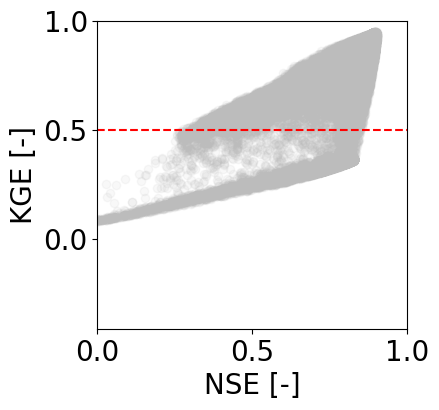

In [32]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df_pre["NSE on Flow"], df_pre["KGE on Flow"], alpha=dot_alpha)
ax.set_xlabel("NSE [-]")
ax.set_ylabel("KGE [-]")
ax.axhline(y=0.5, color='r', linestyle='--')
ax.set_xlim([0, 1])
ax.set_ylim([-0.41, 1])

# Water balance components

In [33]:
df_post.columns

Index(['NSE on Flow', 'NSE on Soil', 'KGE on Flow', 'KGE on Soil',
       'SeasonTrans of Soil dry2wet_start', 'SeasonTrans of Soil dry2wet_end',
       'SeasonTrans of Soil wet2dry_start', 'SeasonTrans of Soil wet2dry_end',
       'SeasonTrans of Soil dry2wet_start_raw',
       'SeasonTrans of Soil dry2wet_end_raw',
       'SeasonTrans of Soil wet2dry_start_raw',
       'SeasonTrans of Soil wet2dry_end_raw', 'KGE on Flow_Behavioral',
       'GLUE_results_Behavioral', 'criteria_id', 'KGE on Soil_Behavioral',
       'SeasonTrans of Soil dry2wet_start_Behavioral',
       'SeasonTrans of Soil dry2wet_end_Behavioral',
       'SeasonTrans of Soil wet2dry_start_Behavioral',
       'SeasonTrans of Soil wet2dry_end_Behavioral', 'bb', 'satdk', 'slop',
       'smcmax', 'wltsmc', 'max_gw_storage', 'expon'],
      dtype='object')

In [34]:
def reproduce_a_run(df, run_id):
    #run_id = df_post_filt.index[0]
    
    # ____________________________________________________
    target_params = df.loc[run_id].copy()


    # ____________________________________________________
    # Get the model config file
    config_CFE_path = rf"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\{site}\config_cfe.json"
    target_config_CFE_path = os.path.join(
        r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\5_post_analysis\temporary_config_reproducing_run", f"config_cfe_{run_id}.json"
    )
    shutil.copyfile(config_CFE_path, target_config_CFE_path)

    with open(target_config_CFE_path) as data_file:
        cfe_cfg = json.load(data_file)


    for i, para in enumerate(params):
        if para in ["bb", "satdk", "slop", "satpsi", "smcmax", "wltsmc", "D"]:
            cfe_cfg["soil_params"][para] = target_params[para]
        else:
            cfe_cfg[para] = target_params[para]

    # Save the config file with new parameters
    with open(target_config_CFE_path, "w") as out_file:
        json.dump(cfe_cfg, out_file)

    # ____________________________________________________
    # Use it to run
    myCFE = bmi_cfe.BMI_CFE(target_config_CFE_path)
    myCFE.initialize()
    if site=="Mahurangi":
        warmup_offset = 400
        max_timestep = 1294
    elif site=="Coweeta":
        warmup_offset = 300
        max_timestep = 1036

    sim = myCFE.run_unit_test(plot=False, warm_up=True, warmup_offset=warmup_offset, warmup_iteration=10, plot_lims=list(range(1, max_timestep)))
    obs = myCFE.load_unit_test_data()

    return sim, obs


In [35]:

def get_target_df(df_post, criteria_id):
    if criteria_id == 1:
        df_post_filt = df_post[df_post["criteria_id"] == criteria_id].nlargest(10, 'KGE on Flow')
    elif criteria_id == 2:
        df_post_filt1 = df_post[df_post["criteria_id"] == criteria_id].nlargest(10, 'KGE on Soil')
        df_post_filt2 = df_post[df_post["criteria_id"] == criteria_id].nlargest(10, 'KGE on Flow')
        df_post_filt = pd.concat([df_post_filt1, df_post_filt2], axis=0)
    elif criteria_id == 3:
        # Assuming df_post and criteria_id are defined

        # Filter the DataFrame by 'criteria_id'
        _df_post_filt1 = df_post[df_post["criteria_id"] == criteria_id]

        # Calculate the maximum value row-wise for the columns of interest
        columns_of_interest = [
            'SeasonTrans of Soil dry2wet_start',
            'SeasonTrans of Soil dry2wet_end',
            'SeasonTrans of Soil wet2dry_start',
            'SeasonTrans of Soil wet2dry_end'
        ]
        _df_post_filt1["max_bias"] = _df_post_filt1[columns_of_interest].max(axis=1)

        # Get the 10 smallest 'max_bias' values
        df_post_filt1 = _df_post_filt1.nsmallest(10, 'max_bias')

        # Get the top 10 largest values of 'KGE on Flow'
        df_post_filt2 = df_post[df_post["criteria_id"] == criteria_id].nlargest(10, 'KGE on Flow')

        # Concatenate the two filtered DataFrames vertically
        df_post_filt = pd.concat([df_post_filt1, df_post_filt2], axis=0)
    
    print(df_post_filt.head())
    return df_post_filt

In [36]:

for criteria_id in range(1, 4):

    # ______________________________________________________
    df_post_filt = get_target_df(df_post, criteria_id)
    df_post_filt.to_csv(os.path.join(output_dir, f"water_balance_{site}_criteria{criteria_id}_params.csv"))

    run_ids = df_post_filt.index

    #  ______________________________________________________
    df_sim_list = []
    for run_id in run_ids:
        # Extract the data for the current run_id
        sim, obs = reproduce_a_run(df_post_filt, run_id)
        
        # Add a column for the run_id to differentiate the runs
        sim['run_id'] = run_id
        
        # Append the run data to the list
        df_sim_list.append(sim)

    df_sim = pd.concat(df_sim_list, axis=0)
    
    print(df_sim)

    #  ______________________________________________________
    grouped_stats = df_sim.groupby('run_id').agg({
    'Rainfall': 'sum',
    'Rainfall landsurface': 'sum',
    'ET from rain': 'sum',
    'ET from soil': 'sum',
    'Flow': 'sum',
    'Direct Runoff': 'sum',
    'GIUH Runoff': 'sum',
    'Lateral Flow': 'sum',
    'Base Flow': 'sum',
    'Influx to GW storage': 'sum',
    'Outflux from GW storage': 'sum',
    'Influx to GIUH storage': 'sum',
    'Outflux from GIUH storage': 'sum',
    'Influx to SM storage': 'sum',
    'Outflux from SM storage': 'sum',
    'Influx to Nash storage': 'sum',
    'Outflux from Nash storage': 'sum'
})

    grouped_stats.to_csv(os.path.join(output_dir, f"water_balance_{site}_criteria{criteria_id}.csv"))
    print(grouped_stats)

    # Combine the mean and standard deviation into a single DataFrame

    mean_stats = grouped_stats.mean()
    std_stats = grouped_stats.std()

    stats_df = pd.DataFrame({
        'Mean': mean_stats,
        'Standard Deviation': std_stats
    })

    # Display the DataFrame
    stats_df.to_csv(os.path.join(output_dir, f"water_balance_{site}_criteria{criteria_id}_stat.csv"))
    print(stats_df)

        NSE on Flow  NSE on Soil  KGE on Flow  KGE on Soil  \
run_id                                                       
202        0.900983     0.586666     0.950116     0.720350   
85334      0.899388    -8.952458     0.949245     0.609228   
87018      0.898074    -4.371177     0.949020     0.643327   
82707      0.895371    -7.507878     0.947251     0.641094   
55705      0.896287    -1.281322     0.947233     0.674337   

        SeasonTrans of Soil dry2wet_start  SeasonTrans of Soil dry2wet_end  \
run_id                                                                       
202                              0.657701                        32.672878   
85334                            0.931660                        32.174847   
87018                            0.290704                        33.148519   
82707                            1.308808                        31.382867   
55705                            0.145533                        33.456250   

        SeasonTran